In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision

from tqdm.notebook import tqdm

import train as trainer

In [2]:
dire = "./Data/Processed" # directory of dataset
# loading data loader
trainloader, testloader = trainer.preprocess_data(directory=dire, batch_size=16, test_size=0.3, rand_num=40, worker=4)

In [3]:
# load pretrained model
# vgg16 = torchvision.models.vgg16(pretrained=True)
# googlenet = torchvision.models.googlenet(pretrained=True)
# efficientnet_b7 = torchvision.models.efficientnet_b7(pretrained=True)
resnet50 = torchvision.models.resnet50(pretrained=True)

In [4]:
class ClassifierNet(nn.Module):
    def __init__(self, pretrained: nn.Module):
        super().__init__()
        # Pretrained
        self.network = pretrained
        # Replace last layer
        self.network.fc = nn.Sequential(nn.Linear(2048, 512), 
                                         nn.ReLU(),  
                                         nn.Dropout(0.25),
                                         nn.Linear(512, 128), 
                                         nn.ReLU(),  
                                         nn.Dropout(0.50), 
                                         nn.Linear(128, 5)
                                        )
    def forward(self, x):
        out = self.network(x)
        return out


Training on cuda


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:[1/10], training loss: 1.4806
Epoch:[2/10], training loss: 1.3391
Epoch:[3/10], training loss: 1.2765
Epoch:[4/10], training loss: 1.1808
Epoch:[5/10], training loss: 1.0668
Accuracy of the network on the 10000 validation x: 53.3333 %
Class accuracy: [0.0, 0.05999999865889549, 1.0, 0.0, 0.0]
Epoch:[6/10], training loss: 1.3580
Epoch:[7/10], training loss: 1.2902
Epoch:[8/10], training loss: 1.2591
Epoch:[9/10], training loss: 1.2080
Epoch:[10/10], training loss: 1.1975
Accuracy of the network on the 10000 validation x: 58.8235 %
Class accuracy: [0.0, 0.5199999809265137, 0.932330846786499, 0.0, 0.0]


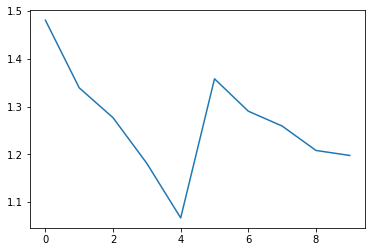

In [5]:
# define params here
net = ClassifierNet(resnet50)
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
epochs = 50
trainer.train(net, optimizer, criterion, epochs, trainloader, testloader)